In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = np.array([[2.5,2.4], [0.5,0.7], [2.2,2.9], [1.9,2.2], [3.1,3], 
              [2.3,2.7], [2,1.6], [1,1.1], [1.5,1.6], [1.1,0.9]])
x = np.array([2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1])
y = np.array([2.4, 0.7, 2.9, 2.2, 3, 2.7, 1.6, 1.1, 1.6, 0.9])
print (np.mean(x))
print (np.mean(y))

1.81
1.9100000000000001


In [4]:
cov_m = np.cov(x,y)
cov_m

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

In [7]:
w, v = np.linalg.eig(cov_m)
print (w)
print (v[0])
# Please note that this eigenvalue representation is different. 
# we will mention this in the tutorial

[0.0490834  1.28402771]
[-0.73517866 -0.6778734 ]


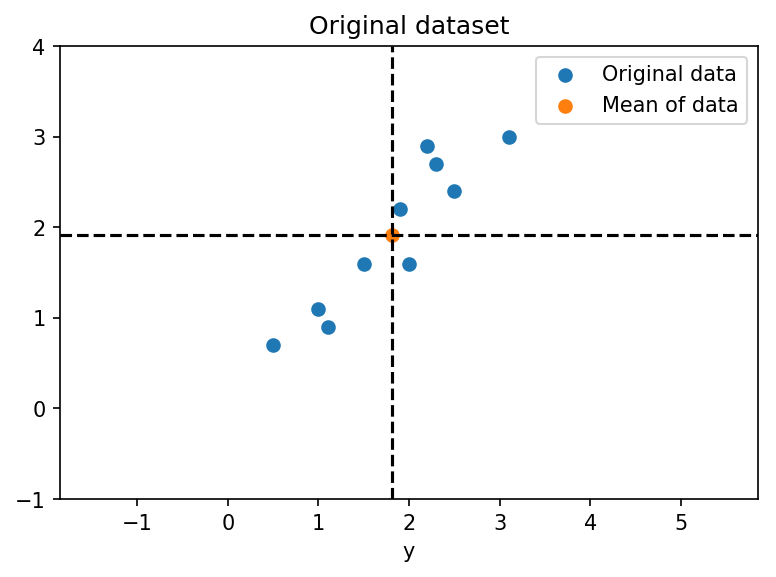

In [248]:
plt.figure(dpi=150)
plt.title("Original dataset")
plt.axvline(x=1.81, color="black", linestyle="--")
plt.axhline(y=1.91, color="black", linestyle="--")
plt.xlabel('x')
plt.xlabel('y')
plt.axis('equal')
plt.xlim((-2,6))
plt.ylim((-1,4))
plt.scatter(x,y,label="Original data")
plt.scatter(np.mean(x), np.mean(y), label="Mean of data")
plt.legend()

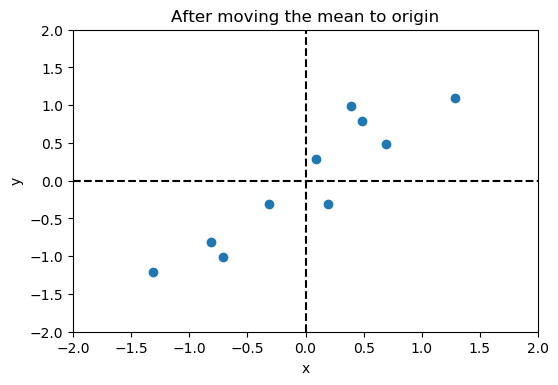

In [210]:
x2 = []
y2 = []
for i in range(10):
    x2.append(x[i]-np.mean(x))
    y2.append(y[i]-np.mean(y))
    
plt.figure(dpi=100)
plt.title("After moving the mean to origin")
plt.axvline(x=0, color="black", linestyle="--")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.scatter(x2,y2)

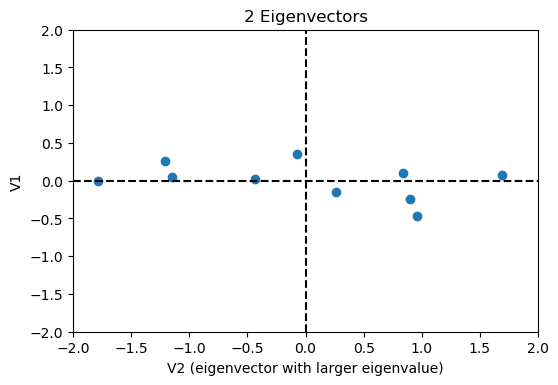

In [214]:
xn = []
yn = []
for i in range(10):
    yn.append(x2[i]*v[1][0]-y2[i]*v[1][1])
    xn.append(x2[i]*v[0][0]-y2[i]*v[0][1])
plt.figure(dpi=100)
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.title("2 Eigenvectors")
plt.axvline(x=0, color="black", linestyle="--")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel('V2 (eigenvector with larger eigenvalue)')
plt.ylabel('V1')
plt.scatter(xn,yn)

[0.839431237604367, -1.7833108509820688, 0.9578143402050505, 0.26274936457212, 1.687262470047819, 0.895757526053889, -0.07045680899024617, -1.1445721637986601, -0.4380461367624502, -1.2066289779498216]


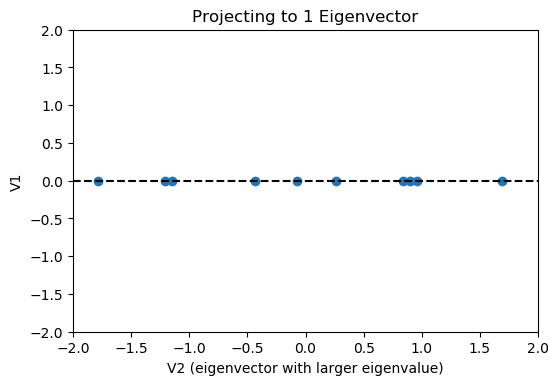

In [216]:
plt.figure(dpi=100)
plt.xlim((-2,2))
plt.ylim((-2,2))
y0 = np.zeros(10)
plt.title("Projecting to 1 Eigenvector")
plt.xlabel('V2 (eigenvector with larger eigenvalue)')
plt.ylabel('V1')
plt.axhline(y=0, color="black", linestyle="--")
plt.scatter(xn,y0)
print (xn)

In [226]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(data)
y3 = pca.transform(data)
y2 = pca.inverse_transform(y3)
print (y3)

[[-0.82797019]
 [ 1.77758033]
 [-0.99219749]
 [-0.27421042]
 [-1.67580142]
 [-0.9129491 ]
 [ 0.09910944]
 [ 1.14457216]
 [ 0.43804614]
 [ 1.22382056]]


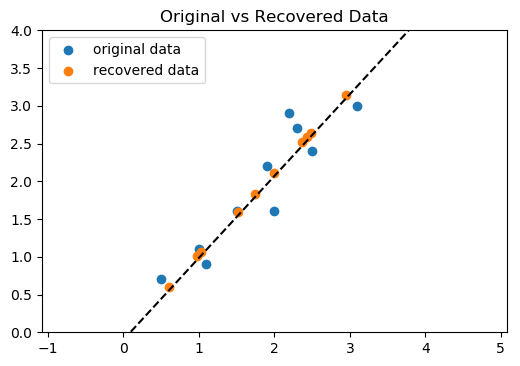

In [232]:
x4 = []
y4 = []
plt.figure(dpi=100)


for i in range(10):
    x4.append(y2[i][0])
    y4.append(y2[i][1])
plt.scatter(x,y,label="original data")
plt.scatter(x4,y4,label="recovered data")
plt.legend()
plt.title("Original vs Recovered Data")
t = np.arange(0.0, 4.0, 0.001)
s = pca.components_[0][1]/pca.components_[0][0] * t - 0.1
plt.axis('equal')
plt.axis([0, 4, 0, 4])
plt.plot(t, s, color="black", linestyle="--")

In [155]:
print (pca.components_)

[[-0.6778734  -0.73517866]]
